In [2]:
import data_loader

data = data_loader.get_V2_data()

Loaded 64 samples for gene HPRT1 	total number of samples: 64
Loaded 149 samples for gene CCDC101 	total number of samples: 213
Loaded 924 samples for gene MED12 	total number of samples: 1137
Loaded 190 samples for gene TADA2B 	total number of samples: 1327
Loaded 109 samples for gene TADA1 	total number of samples: 1436
Loaded 154 samples for gene CUL3 	total number of samples: 1590
Loaded 736 samples for gene NF1 	total number of samples: 2326
Loaded 223 samples for gene NF2 	total number of samples: 2549
Loaded 924 samples for gene MED12 	total number of samples: 3473


In [3]:
import pickle
for i in data:
    pickle.dump(data[i], open('data/%s.p' % i, 'wb'))

In [4]:
for i in data:
    print i, len(data[i])

CCDC101 148
HPRT1 63
MED12 1847
NF2 222
NF1 735
TADA1 108
TADA2B 189
CUL3 153


In [5]:
import numpy as np

def count(s):
    c = lambda x: sum(i == x for i in s)
    return c('A'), c('T'), c('C'), c('G')

def vec(s):
    return np.array(count(s)) #np.array(['ATCG'.index(i) for i in s])
    
for i in data:
    print i
    for a, b in [(j[0], j[1]) 
              for j in sorted(data[i], key=lambda i: -i[1])[:3]]:
        print a, b
    print

CCDC101
CCAGGCTTCCCGATCCACAG 0.82200809
ACATCCAGAAGACCCATGAG 0.77996483
AGTCTCTGTTGGAAGAGAGG 0.77996282

HPRT1
TTATGCTGAGGATTTGGAAA 0.769596695
GTAGCCCTCTGTGTGCTCAA 0.74804509
CTAGAATGACCAGTCAACAG 0.721098558

MED12
GCATTGGTAAGCGCACAGGA 0.913185582
GCATTGGTAAGCGCACAGGA 0.913185582
GTAGCTGCCCACCAGATCCG 0.882719083

NF2
GCACAATGAGAACTCCGACA 0.871919619
GCTTGGTACGCAGAGCACCG 0.861398837
TGAAAAGGCCCAGATCACCG 0.856509475

NF1
CTACTAAGAAAGTAACAACG 0.874047681
TTATCTTTAATAGAGTCCAG 0.866257939
GGTCCAGTCAGTGAACGTAA 0.862670871

TADA1
GCAAAACCTGGAAAACCCAA 0.95195016
GCTGGATTCTGACCAGCACA 0.795121081
GGCCAAGAAGAACTTAAGCG 0.768913059

TADA2B
GACAGGTGTGGTCTGTCACG 0.857967207
CCAAGATCCGAGAACTGCAG 0.831714065
TCAGCCACAGAGATGTCCAG 0.77440091

CUL3
CCTGTGGTAAACCAACACAG 0.913634847
GCACTGCCTTGACAAATCAA 0.866128918
CATTGTTGAATGATTCCAGG 0.811687365



In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [26]:
data_arr = [(i, vec(a)) for i in data for a, b in data[i]]
labels = np.array([x[0] for x in data_arr])
sequences = np.array([x[1] for x in data_arr])
em = TSNE(n_components=2, verbose=1).fit_transform(sequences)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3465 samples in 0.001s...
[t-SNE] Computed neighbors for 3465 samples in 0.070s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3465
[t-SNE] Computed conditional probabilities for sample 2000 / 3465
[t-SNE] Computed conditional probabilities for sample 3000 / 3465
[t-SNE] Computed conditional probabilities for sample 3465 / 3465
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.205544
[t-SNE] KL divergence after 1000 iterations: 0.442758


CCDC101 148
HPRT1 63
MED12 1847
NF2 222
NF1 735
TADA1 108
TADA2B 189
CUL3 153


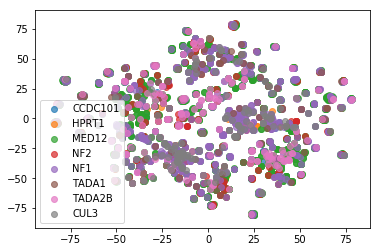

In [27]:
genes = np.array([x for x in data])
select = range(8)
for i in genes[select]:
    print i, len(data[i])
    plt.scatter(em[labels == i, 0], em[labels == i, 1], alpha=0.7, label=i)
plt.legend()
plt.show()